<a href="https://colab.research.google.com/github/omkharche8/PDFAnalyzer/blob/main/CXO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q langchain==0.0.150 pypdf pandas matplotlib tiktoken textract transformers openai faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.4/648.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.0/271.0 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 121.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 111.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 130.3 MB/s eta 0:00

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [ ]:
os.environ["OPENAI_API_KEY"] = "APIKEY"

In [ ]:
loader = PyPDFLoader("./dsa.pdf")
pages = loader.load_and_split()
print(pages[0])

chunks = pages

page_content='BCSE202L Data Structures and Algorithms (3-0-0- 3) \nImportance of algorithms and data structures - Algorithm analysis - Algorithm efficiency – \nLinear Data Structures: Arrays, Stacks, Queues, List – Searching and Sorting – Trees – \nBinary Trees – Binary Search Trees – Graphs: Traversals – Hashing and its types – Heaps – \nAVL Trees and its operations. \nAgenda Item 65/39 - Annexure - 35\nProceedings of the 65th Academic Council (17.03.2022)\n967' metadata={'source': './dsa.pdf', 'page': 0}


In [ ]:
import textract
doc = textract.process("./dsa.pdf")


with open('dsa.txt', 'w') as f:
    f.write(doc.decode('utf-8'))

with open('dsa.txt', 'r') as f:
    text = f.read()

tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))


text_splitter = RecursiveCharacterTextSplitter(

    chunk_size = 512,
    chunk_overlap  = 24,
    length_function = count_tokens,
)

chunks = text_splitter.create_documents([text])

In [ ]:
type(chunks[0])

langchain.schema.Document

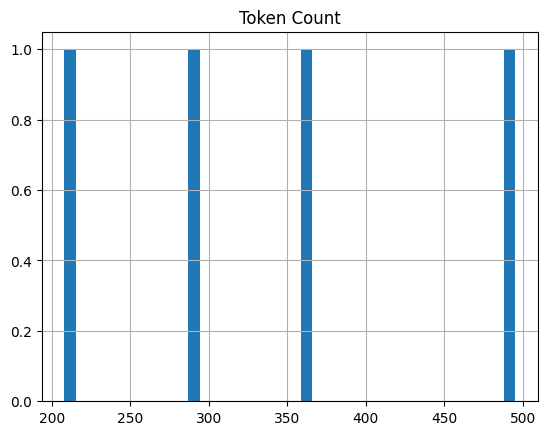

In [ ]:
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]


df = pd.DataFrame({'Token Count': token_counts})


df.hist(bins=40, )

plt.show()

In [ ]:

embeddings = OpenAIEmbeddings()


db = FAISS.from_documents(chunks, embeddings)

In [ ]:

query = "What are the course outcomes"
docs = db.similarity_search(query)
docs[0]

Document(page_content='•  Forward declaring symbols from namespace std:: yields undefined behavior. \n• \n\nIt can be difficult to determine whether a forward declaration or a full #include is needed. Replacing \nan #include with a forward declaration can silently change the meaning of code: \n\n•  // b.h: \n\n\x0c•  struct B {}; \n•  struct D : B {}; \n•   \n•  // good_user.cc: \n•  #include "b.h" \n•  void f(B*); \n•  void f(void*); \n•  void test(D* x) { f(x); }  // Calls f(B*) \n\nIf the #include was replaced with forward decls for B and D, test() would call f(void*). \n\n•  Forward declaring multiple symbols from a header can be more verbose than simply #includeing the \n\nheader. \n\n•  Structuring code to enable forward declarations (e.g., using pointer members instead of object members) can \n\nmake the code slower and more complex. \n\nTry to avoid forward declarations of entities defined in another project. \n\nInline Functions\n\n \n\nDefine functions inline only when they a

In [ ]:
chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")

query = "What is "
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

' Selection sort is a sorting algorithm that works by repeatedly finding the minimum element (or maximum, depending on sorting order) from the unsorted part of the list and putting it at the beginning. It is an in-place comparison sort.'

If you want chatmemory


In [ ]:
from IPython.display import display
import ipywidgets as widgets

qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0.1), db.as_retriever())

In [ ]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the State of the Union chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))

print("Welcome to the chatbot! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)